# Generate Datasets for Training and Testing on a cluster of machines

In this notebook, we report the code to generate datasets for training and testing the neural network models.
The datasets contain channel realizations of a realistic LTE link operating over an industry-standard radio channel model. Thid code is structured to be run on a cluster of machines using the package `ray`.

In [1]:
import time
import itpp
import ray
import os

import numpy as np
from matplotlib import pyplot as plt

from src import TDL_channel

In [2]:
@ray.remote
def _run_link_simulation(block_size, 
                         modorder,
                         nrof_subcarriers,
                         snr, 
                         channel_coeff):
    
    from src import single_link_bicm_ofdm

    channel_block_fading = np.tile(np.transpose(channel_coeff), (12, 1))
    
    return single_link_bicm_ofdm.simulate(block_size, 
                                          modorder,
                                          nrof_subcarriers,
                                          snr, 
                                          channel_block_fading)

In [3]:
ray.init(address="10.0.0.5:15672", ignore_reinit_error=True)

2020-02-13 22:33:26,315	WARNING worker.py:682 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.


{'node_ip_address': '10.0.0.5',
 'object_store_address': '/tmp/ray/session_2020-02-13_16-06-05_058862_24077/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-02-13_16-06-05_058862_24077/sockets/raylet',
 'redis_address': '10.0.0.5:15672',
 'session_dir': '/tmp/ray/session_2020-02-13_16-06-05_058862_24077',
 'webui_url': None}

In [4]:
# Channel Generation
fft_size       = 128
channel_model  = 'AWGN'
#relative_speed = 33.33 # m/s

nrof_subcarriers = 72
snrs_db        = np.arange( -8, 19, 0.5 )#[5, 10, 15, 20, 25] 

TRANSPORT_BLOCK_SIZES = [152, 200, 248, 320, 408, 504, 600, 712, 808, 936, 
                         936, 1032, 1192, 1352, 1544, 1736, 1800, 
                         1800, 1928, 2152, 2344, 2600, 2792, 2984, 3240, 3496, 3624, 3752, 4008]
MODULATION_ORDERS     = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
                         4, 4, 4, 4, 4, 4, 4, 
                         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [5]:
nrof_snrs = len(snrs_db)
nrof_samples = 100

Block size index 0, TBS 176, Elapsed: 1.53s
[0.99, 0.95, 0.8, 0.49, 0.24, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Block size index 1, TBS 224, Elapsed: 3.22s
[1.0, 1.0, 1.0, 1.0, 0.85, 0.67, 0.34, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Block size index 2, TBS 272, Elapsed: 5.02s
[1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.89, 0.59, 0.1, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Block size index 3, TBS 344, Elapsed: 7.04

Block size index 26, TBS 3648, Elapsed: 161.85s
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92, 0.27, 0.01, 0.0, 0.0, 0.0, 0.0]
Block size index 27, TBS 3776, Elapsed: 171.55s
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.28, 0.0, 0.0, 0.0, 0.0]
Block size index 28, TBS 4032, Elapsed: 182.13s
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.64, 0.02, 0.0]


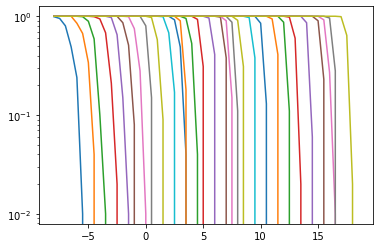

In [7]:
'''Generate the channel realizations'''

channel_coeff = np.ndarray((nrof_samples, nrof_subcarriers, nrof_snrs), dtype=np.complex128)

if channel_model != 'AWGN':
    for snr_index in range(nrof_snrs):
        channel_response = TDL_channel.channel_frequency_response( fft_size,
                                                                   relative_speed,
                                                                   channel_model,
                                                                   nrof_samples )

        channel_coeff[:,:,snr_index] = channel_response.T().to_numpy_ndarray()[:, :nrof_subcarriers]
else:
    channel_coeff[:, :, :] = 1

legend_strings = []

snr_vs_per_dataset = np.ndarray((nrof_snrs, len( TRANSPORT_BLOCK_SIZES )))

start = time.time()
for block_size_index in range( len( TRANSPORT_BLOCK_SIZES ) ):

    block_size = TRANSPORT_BLOCK_SIZES[ block_size_index]  + 24 # 24 bit CRC
    modorder = MODULATION_ORDERS[ block_size_index ]

    snr_vs_per = []

    outcome = ray.get([_run_link_simulation.remote(block_size, 
                                                   modorder,
                                                   nrof_subcarriers,
                                                   snrs_db[i], 
                                                   channel_coeff[:,:,i]) for i in range(nrof_snrs)])

    for snr_index in range(nrof_snrs):
        snr_vs_per.append(outcome[snr_index][0])
        #print(outcome[snr_index][0])

    snr_vs_per_dataset[:, block_size_index] = snr_vs_per
    
    legend_strings.append('TBS %df' %(block_size))
    plt.semilogy(snrs_db, snr_vs_per)

    print('Block size index %d, TBS %d, Elapsed: %0.2fs' %(block_size_index, 
                                                           block_size, 
                                                           time.time() - start))

    #print(snr_vs_per)

In [9]:
AWGN_CHANNEL_DATASET = {'snr_vs_per': snr_vs_per_dataset,
                        'snr_range_dB': snrs_db}

#data_filepath = 'sim_data/sim_0001/'
#data_filename = 'dataset.npy'  

#if not os.path.exists(data_filepath):
#    os.makedirs(data_filepath)  

np.save( 'AWGN_DATASET.npy', AWGN_CHANNEL_DATASET)

2020-02-13 22:40:41,982	ERROR worker.py:1065 -- listen_error_messages_raylet: Connection closed by server.
2020-02-13 22:40:41,995	ERROR import_thread.py:93 -- ImportThread: Connection closed by server.
2020-02-13 22:40:42,000	ERROR worker.py:965 -- print_logs: Connection closed by server.


(pid=raylet) *** Aborted at 1581633641 (unix time) try "date -d @1581633641" if you are using GNU date ***
(pid=raylet) PC: @                0x0 (unknown)
(pid=raylet) *** SIGTERM (@0x3e8000062e1) received by PID 24099 (TID 0x7f42fd795780) from PID 25313; stack trace: ***
(pid=raylet)     @     0x7f42fcc49890 (unknown)
(pid=raylet)     @     0x7f42fc547b77 epoll_wait
(pid=raylet)     @           0x4187ec boost::asio::detail::epoll_reactor::run()
(pid=raylet)     @           0x418f29 boost::asio::detail::scheduler::run()
(pid=raylet)     @           0x409e31 main
(pid=raylet)     @     0x7f42fc447b97 __libc_start_main
(pid=raylet)     @           0x40e8c1 (unknown)


In [3]:
#data_filepath = 'sim_data/sim_0001/'
#data_filename = 'dataset.npy'  

#if not os.path.exists(data_filepath):
#    os.makedirs(data_filepath)  

#np.save(data_filepath + data_filename, FADING_CHANNEL_DATASET)

#FADING_CHANNEL_DATASET

NameError: name 'os' is not defined

In [ ]:
plt.xlabel('SNR [dB]')
plt.ylabel('BLER')
plt.legend(legend_strings, loc='upper left')
plt.title('Turbo Codec performance for %s channel' %(channel_model))
plt.savefig(data_filepath + 'plot.png')
plt.show()